# Check problems with Bidisperse Ice

The problem with the current bidisperse ice is that it nearly exactly replicates the results of the not bidisperse ice. This is very strange and I (Antonio) suspect something is wrong. 

To see if there is something wrong we will start with the trajectory.

In [1]:
import sys
import os
import shutil
sys.path.insert(0, 'icenumerics/')

import pandas as pd
import numpy as np
import scipy.spatial as spa
import matplotlib.pyplot as plt
import matplotlib as mpl

import icenumerics as ice
import magcolloids as mgc

from icenumerics.geometry import ordering 
import csv as csv
import time
import string as st
from multiprocessing import Pool

import copy as cp

ureg = ice.ureg

idx = pd.IndexSlice

import tqdm.auto as tqdm

%reload_ext autoreload
%autoreload 2

In [2]:
mpl.rc('text', usetex=True)
mpl.rcParams['figure.dpi'] = 150

In [3]:
directory = "."

### Bidisperse

First we load Bidisperse ice and plot the trajectories 

In [4]:
index_bi = pd.read_csv(os.path.join(directory, "index_Bidisperse.dat"), sep = "\t")

In [5]:
entry = index_bi.iloc[0]
entry

filename    BidisperseColloidalIce_l22_exp3
l                                        22
exp                                       3
Name: 0, dtype: object

In [6]:
lzrd = mgc.trj_lazyread(os.path.join(directory, entry.filename+ ".lammpstrj"),
                 output = ["x","y","z", "mux", "muy", "muz"])

In [7]:
%%time 

trj = lzrd[::10]

bnd = lzrd.get_bounds(sl = slice(0,-1,10))

CPU times: user 1.12 s, sys: 20.9 ms, total: 1.14 s
Wall time: 1.14 s


In [8]:
trj.type.unique()

array([1, 2])

This is already a little strange. 

In [9]:
ice_trj = ice.get_ice_trj(trj, bnd)

### Are traps really different?

(300, 400)

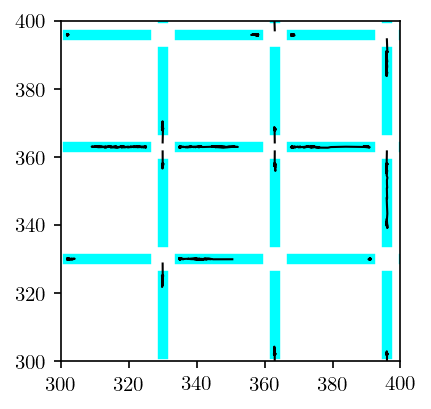

In [10]:
plt.figure(figsize=(3,3))

for i, trap_i in ice_trj.loc[0].groupby("id"):
    
    plt.plot([trap_i.x.values-trap_i.dx.values/2,
              trap_i.x.values+trap_i.dx.values/2],
             [trap_i.y.values-trap_i.dy.values/2,
              trap_i.y.values+trap_i.dy.values/2],
             color = "cyan", linewidth = 5)
    
    
for i, trj_i in ice_trj.groupby("id"):
        
    plt.plot(trj_i.x+trj_i.cx, trj_i.y+trj_i.cy, "k", linewidth = 1)
    
plt.axis("square")

plt.xlim(300,400)
plt.ylim(300,400)

### Are particles really different?

Text(0, 0.5, '$m_z$')

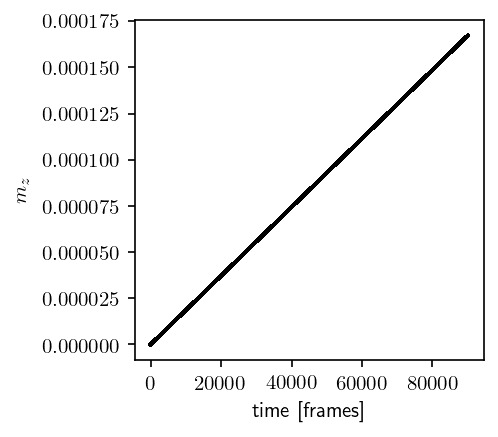

In [11]:
plt.figure(figsize=(3,3))

for i, trj_i in trj.query("type==1").groupby("id"):
    plt.plot(trj_i.index.get_level_values("frame"),
            trj_i.muz, color = "k")
    
plt.xlabel("time [frames]")
plt.ylabel(r"$m_z$")

In conclussion, bidisperse systems are not bidisperse. 

### Monodisperse

Now we load Monodisperse ice to be sure

In [12]:
index_mn = pd.read_csv(os.path.join(directory, "index_Monodisperse.dat"), sep = "\t")

In [13]:
entry = index_mn.iloc[0]
entry

filename    MonodisperseColloidalIce_l22_exp3
l                                          22
exp                                         3
Name: 0, dtype: object

In [14]:
lzrd = mgc.trj_lazyread(os.path.join(directory, entry.filename+ ".lammpstrj"),
                 output = ["x","y","z", "mux", "muy", "muz"])

In [15]:
%%time 

trj = lzrd[::10]

bnd = lzrd.get_bounds(sl = slice(0,-1,10))

CPU times: user 1.12 s, sys: 11.8 ms, total: 1.14 s
Wall time: 1.13 s


In [16]:
trj.type.unique()

array([1, 2])

Likely they are also monodisperse

In [17]:
ice_trj = ice.get_ice_trj(trj, bnd)

### Are traps really different?

(300, 400)

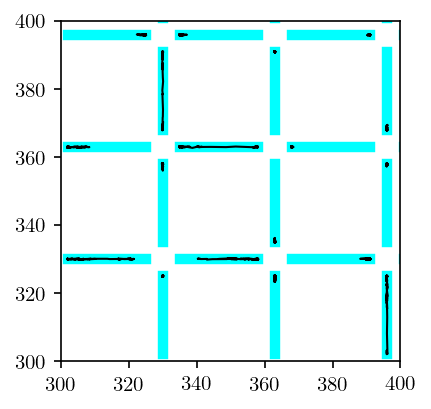

In [18]:
plt.figure(figsize=(3,3))

for i, trap_i in ice_trj.loc[0].groupby("id"):
    
    plt.plot([trap_i.x.values-trap_i.dx.values/2,
              trap_i.x.values+trap_i.dx.values/2],
             [trap_i.y.values-trap_i.dy.values/2,
              trap_i.y.values+trap_i.dy.values/2],
             color = "cyan", linewidth = 5)
    
    
for i, trj_i in ice_trj.groupby("id"):
        
    plt.plot(trj_i.x+trj_i.cx, trj_i.y+trj_i.cy, "k", linewidth = 1)
    
plt.axis("square")

plt.xlim(300,400)
plt.ylim(300,400)

Traps look monodisperse as before, but now trajectories are within the region defined by the trap

### Are particles different?

Text(0, 0.5, '$m_z$')

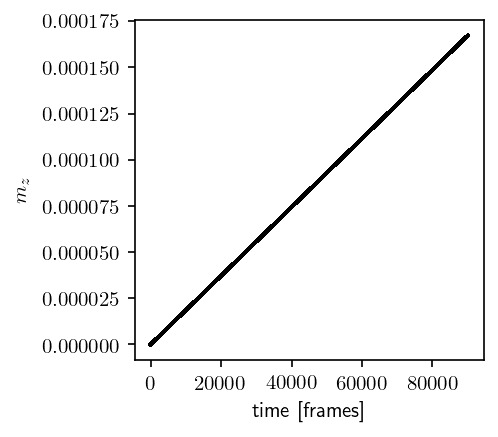

In [19]:
plt.figure(figsize=(3,3))

for i, trj_i in trj.query("type==1").groupby("id"):
    plt.plot(trj_i.index.get_level_values("frame"),
            trj_i.muz, color = "k")
    
plt.xlabel("time [frames]")
plt.ylabel(r"$m_z$")

In conclussion, Monodisperse systems are monodisperse. 